In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptops-ml-csv/laptops.csv


In [2]:
df = pd.read_csv("/kaggle/input/laptops-ml-csv/laptops.csv")
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


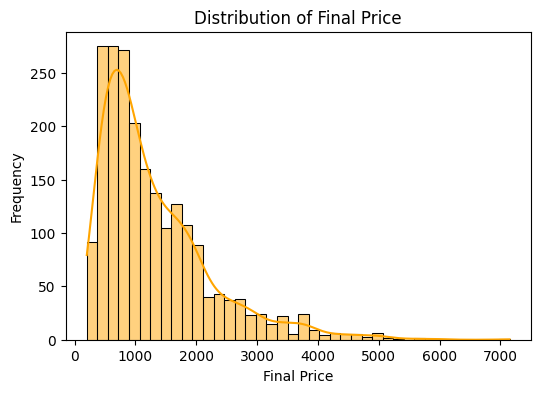

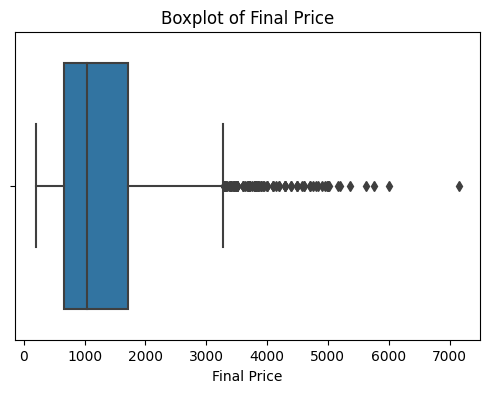

In [5]:
plt.figure(figsize=(6,4))

# Histogram to visualize the distribution of 'final_price'
sns.histplot(df['final_price'],color= 'orange', bins=40, kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot 
plt.figure(figsize=(6,4))
sns.boxplot(x=df['final_price'])
plt.title('Boxplot of Final Price')
plt.xlabel('Final Price')
plt.show()

# Question 1

In [6]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

# Question 2

In [7]:
ram_median = df['ram'].median()
print(f"The median RAM is: {ram_median}")

The median RAM is: 16.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression function


In [8]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#  Root Mean Squared Error (RMSE)

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Split the dataset in to 60/20/20 - train/val/test

In [31]:
np.random.seed(42)  


n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train['final_price'].values
y_val_orig = df_val['final_price'].values
y_test_orig = df_test['final_price'].values

y_train = np.log1p(df_train['final_price'].values)
y_val = np.log1p(df_val['final_price'].values)
y_test = np.log1p(df_test['final_price'].values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

print(f'Training set size: {len(df_train)}')
print(f'Validation set size: {len(df_val)}')
print(f'Test set size: {len(df_test)}')


Training set size: 1296
Validation set size: 432
Test set size: 432


# Question 3

In [32]:
df_train_0 = df_train_0.apply(pd.to_numeric, errors='coerce')
df_val_0 = df_val_0.apply(pd.to_numeric, errors='coerce')

df_train['screen'] = df_train['screen'].fillna(0)
df_val['screen'] = df_val['screen'].fillna(0)

In [33]:
X_train_0 = df_train_0.values
X_val_0 = df_val_0.values
X_train_0

array([[ nan,  nan,  nan, ...,  nan, 15.6,  nan],
       [ nan,  nan,  nan, ...,  nan, 14.1,  nan],
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan, 15.6,  nan],
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan],
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan]])

In [34]:
X_val_0

array([[ nan,  nan,  nan, ...,  nan, 16. ,  nan],
       [ nan,  nan,  nan, ...,  nan, 15.6,  nan],
       [ nan,  nan,  nan, ...,  nan, 15.6,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan],
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan],
       [ nan,  nan,  nan, ...,  nan, 14. ,  nan]])

In [35]:
w_0, w_0_weights = train_linear_regression(X_train_0, y_train)

In [47]:
y_pred_0 = w_0 + X_val_0.dot(w_0_weights)


In [38]:
rmse_0 = rmse(y_val, y_pred_0)
print(f"RMSE (fill with 0): {round(rmse_0, 2)}")

RMSE (fill with 0): nan


In [39]:
df_train_mean = df_train_mean.apply(pd.to_numeric, errors='coerce')
df_val_mean = df_val_mean.apply(pd.to_numeric, errors='coerce')

In [42]:
mean_screen_train = df_train['screen'].mean()
df_train['screen'] = df_train['screen'].fillna(mean_screen_train)
df_val['screen'] = df_val['screen'].fillna(mean_screen_train)
# Train and evaluate the model for option 2 (fill with mean)
X_train_mean = df_train_mean.values
X_val_mean = df_val_mean.values

In [43]:
w_mean, w_mean_weights = train_linear_regression(X_train_mean, y_train)

In [44]:
y_pred_mean = w_mean + X_val_mean.dot(w_mean_weights)

In [45]:
rmse_mean = rmse(y_val, y_pred_mean)
print(f"RMSE (fill with mean): {round(rmse_mean, 2)}")

RMSE (fill with mean): nan


In [48]:
# Compare RMSE
if rmse_mean < rmse_0:
    print("Filling with mean gives a better RMSE.")
else:
    print("Filling with 0 gives a better RMSE.")

Filling with 0 gives a better RMSE.


# Question 4

In [55]:
from sklearn.linear_model import Ridge

In [56]:
df_train_filled = df_train.copy()
df_val_filled = df_val.copy()

df_train_filled['screen'] = df_train_filled['screen'].fillna(0)
df_val_filled['screen'] = df_val_filled['screen'].fillna(0)

# Convert to numeric values if needed
df_train_filled = df_train_filled.apply(pd.to_numeric, errors='coerce')
df_val_filled = df_val_filled.apply(pd.to_numeric, errors='coerce')

# Replace any NaNs with 0 (if any exist)
df_train_filled.fillna(0, inplace=True)
df_val_filled.fillna(0, inplace=True)

# Prepare training and validation data
X_train = df_train_filled.values
X_val = df_val_filled.values


In [57]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

In [58]:
for r in r_values:
    # Ridge regression (L2 regularization) with alpha = r
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(round(score, 2))

In [59]:
for r, score in zip(r_values, rmse_scores):
    print(f"RMSE for r = {r}: {score}")

RMSE for r = 0: 0.42
RMSE for r = 0.01: 0.43
RMSE for r = 0.1: 0.43
RMSE for r = 1: 0.43
RMSE for r = 5: 0.43
RMSE for r = 10: 0.43
RMSE for r = 100: 0.43


In [60]:
best_r_index = np.argmin(rmse_scores)
best_r = r_values[best_r_index]
best_rmse = rmse_scores[best_r_index]

print(f"\nThe best r is {best_r} with RMSE: {best_rmse}")


The best r is 0 with RMSE: 0.42


# Question 5

In [108]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

In [110]:
for seed in seeds:
    np.random.seed(seed)
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    y_train = np.log1p(df_train['final_price'].values)
    y_val = np.log1p(df_val['final_price'].values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

In [112]:

df_train['screen'] = df_train['screen'].fillna(0)
df_val['screen'] = df_val['screen'].fillna(0)


df_train = df_train.apply(pd.to_numeric, errors='coerce')
df_val = df_val.apply(pd.to_numeric, errors='coerce')


df_train.fillna(0, inplace=True)
df_val.fillna(0, inplace=True)

In [114]:

X_train = df_train.values
X_val = df_val.values

# Use Ridge Regression (regularized linear regression)
model = Ridge(alpha=0)  # No regularization, still uses Ridge for stability
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Calculate RMSE for the current seed
score = rmse(y_val, y_pred)
rmse_scores.append(score)

In [119]:
std = np.std(rmse_scores)
std_rounded = round(std, 3)

In [120]:
print(f"Standard deviation of RMSE scores: {std_rounded}")

Standard deviation of RMSE scores: 0.0


# Question 6

In [121]:
from sklearn.preprocessing import StandardScaler

In [132]:
seed = 9
np.random.seed(seed)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train_full = pd.concat([df_train, df_val])

y_train_full = df_train_full['final_price'].values
y_test = df_test['final_price'].values

del df_train_full['final_price']
del df_test['final_price']

In [133]:
df_train_full['screen'] = df_train_full['screen'].fillna(0)
df_test['screen'] = df_test['screen'].fillna(0)

df_train_full = df_train_full.apply(pd.to_numeric, errors='coerce')
df_test = df_test.apply(pd.to_numeric, errors='coerce')

df_train_full.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [134]:
scaler = StandardScaler()
X_train_full = scaler.fit_transform(df_train_full.values)
X_test = scaler.transform(df_test.values)

In [135]:
model = Ridge(alpha=0.001)
model.fit(X_train_full, y_train_full)

Ridge(alpha=0.001)

In [136]:
y_pred_test = model.predict(X_test)

In [137]:
rmse_test = rmse(y_test, y_pred_test)

print(f"RMSE on test dataset: {rmse_test:.2f}")

RMSE on test dataset: 606.89
